<a href="https://colab.research.google.com/github/sayali1004/BDA594/blob/main/Pycaret_diamond_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing PyCaret
and inbuilt dataset diamond!!

In [ ]:
!pip install pycaret
!pip install jinja2
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Performing EDA and Visualization

In [ ]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'],
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'yellow', title = ' A CASE STUDY')
fig.show()

Let’s check the distribution of the target variable(Price)

*   Right Skewed distrubution
*   A log transformation to make price normal is needed

In [ ]:
# plot histogram
fig = px.histogram(data, x=["Price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()

Log Transformation
takes skewness away and makes target variable normal

In [ ]:
import numpy as np
# create a copy of data
data_copy = data.copy()
# create a new feature Log_Price
data_copy['Log_Price'] = np.log(data['Price'])
# plot histogram
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgram of Log Price', template = 'plotly_dark')
fig.show()


Data Processing:
setup function is the one and only step that takes care about your data processing

passed ---log_experiment = True and experiment_name = 'diamond' , this will
tell PyCaret to automatically log all the metrics, hyperparameters, and model artifacts behind the scene as you progress through the modeling phase. This is possible due to integration with MLflow.

In [ ]:

!pip install --upgrade mlflow
from pycaret.regression import setup, compare_models

# Assuming `data` is your DataFrame
s = setup(
    data= data,
    target='Price',
    transform_target=True,
    log_experiment=True,
    experiment_name='diamond'
)



,Description,Value
0,Session id,6915
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


Model Training & Selection
*   train all the algorithms available in the model library
*   Evaluates using k fold cross validation




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,617.5408,1735599.3098,1289.4150,0.9840,0.0659,0.0480,1.6630
xgboost,Extreme Gradient Boosting,647.9182,1757403.9072,1307.5873,0.9837,0.0688,0.0503,0.3790
et,Extra Trees Regressor,714.5262,1993864.9881,1395.4934,0.9817,0.0787,0.0577,1.9110
rf,Random Forest Regressor,714.7640,2056359.3597,1416.3029,0.9810,0.0775,0.0568,1.5840
gbr,Gradient Boosting Regressor,736.0425,2434452.1684,1513.8650,0.9778,0.0755,0.0563,0.4490
dt,Decision Tree Regressor,896.6020,3363628.1767,1799.6548,0.9693,0.0997,0.0719,0.2900
ada,AdaBoost Regressor,2022.1387,19160272.5278,4315.6471,0.8271,0.1911,0.1498,0.4020
knn,K Neighbors Regressor,3054.6993,35909809.9987,5983.5728,0.6629,0.3600,0.2319,0.1770
omp,Orthogonal Matching Pursuit,3403.2127,90440888.8440,9308.3882,0.1504,0.2852,0.2255,0.3200
lasso,Lasso Regression,6635.9738,121559061.8011,10993.8606,-0.1247,0.7213,0.5665,0.2880


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2024/11/13 01:14:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/13 01:14:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/13 01:14:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/13 01:14:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/13 01:14:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/13 01:14:17 

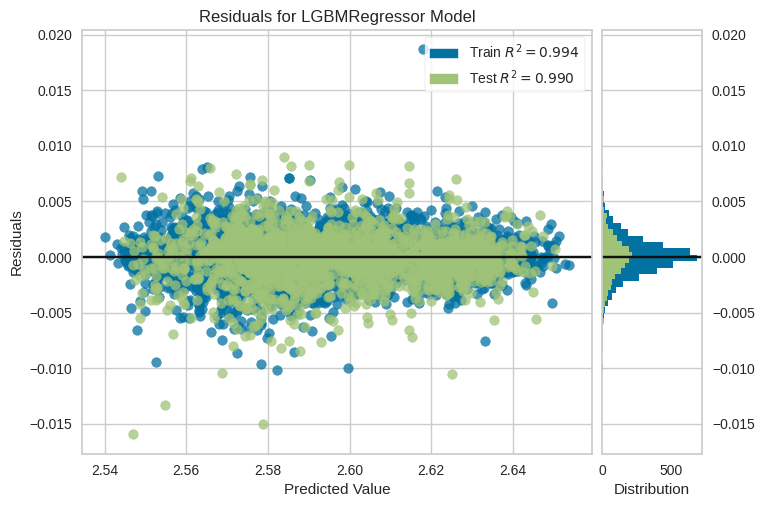

In [ ]:
# compare all models
best = compare_models()
# check the residuals of trained model

from pycaret.regression import plot_model

plot_model(best, plot = 'residuals')

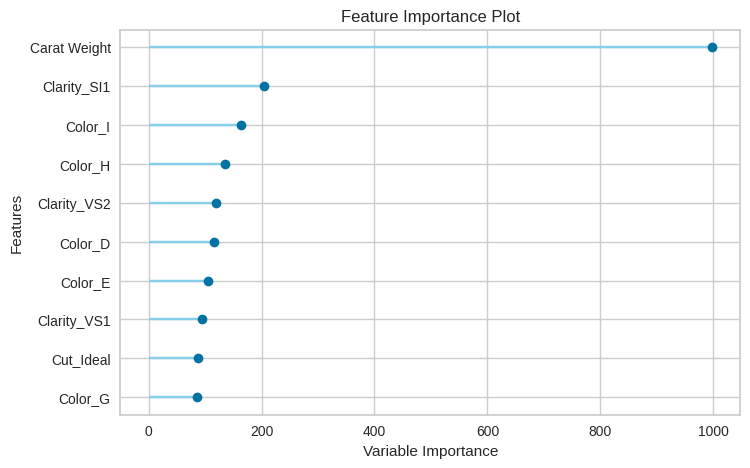

In [ ]:
# check feature importance
plot_model(best, plot = 'feature')

Creating a Data Pipeline: You can use this Pipeline to generate predictions on the new data

In [ ]:
from pycaret.regression import finalize_model, save_model # Import required functions

# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'diamond-pipeline')

2024/11/13 01:15:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                        

Further if you want you can deploy the model according to your needs!!!